In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 21)

import utils.nervousness_comparator as nerv_comparator

import utils.plotter_proof as proof
import utils.calc as calc

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def get_schedule_filename(prefix: str = "", day: int = 0, data_txt: str = "schedule", suffix: str = "") -> str:
    file_template = "data/{prefix}_{data}_{day:02d}{suffix}.csv"
    if suffix:
        suffix = f"_{suffix}"
    return file_template.format(prefix=prefix,data=data_txt,day=day, suffix=suffix)

In [4]:
df_plan_init =  pd.read_csv(get_schedule_filename("10", day=0, suffix="init"))
df_plan_init = df_plan_init.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
df_plan_init

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,Job_000,0,0,792,M0,0,29,29,-763,0,763
1,Job_000,1,0,792,M1,29,78,107,-685,0,685
2,Job_000,2,0,792,M2,107,9,116,-676,0,676
3,Job_000,3,0,792,M3,116,36,152,-640,0,640
4,Job_000,4,0,792,M4,152,49,201,-591,0,591
...,...,...,...,...,...,...,...,...,...,...,...
565,Job_056,5,4220,6028,M9,4637,76,4713,-1315,0,1315
566,Job_056,6,4220,6028,M5,4713,47,4760,-1268,0,1268
567,Job_056,7,4220,6028,M3,4760,52,4812,-1216,0,1216
568,Job_056,8,4220,6028,M4,4812,90,4902,-1126,0,1126


In [5]:
df_last_ops_init = df_plan_init.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
df_last_ops_init.head()

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Lateness,Tardiness,Earliness
9,Job_000,9,0,792,M9,771,21,792,0,0,0
19,Job_001,9,82,1593,M8,1563,30,1593,0,0,0
29,Job_002,9,143,1682,M4,1649,33,1682,0,0,0
39,Job_003,9,194,1784,M5,1741,43,1784,0,0,0
49,Job_004,9,231,1749,M6,1696,53,1749,0,0,0


In [6]:
def append_plans_and_last_ops(schedule_prefix: str, last_planning_start: int, df_plan_list: list, df_last_ops_list: list):
    for day_numb in range(1, last_planning_start + 1):
        filename = get_schedule_filename(schedule_prefix, day=day_numb)
        df_plan_temp = pd.read_csv(filename)
        df_plan_temp = df_plan_temp.sort_values(by=["Arrival", "Start"]).reset_index(drop=True)
        df_plan_list.append(df_plan_temp)

        df_last_ops = df_plan_temp.sort_values(['Job', 'Operation']).drop_duplicates('Job', keep='last')
        df_last_ops_list.append(df_last_ops)


### Mit "Deviation Penalty"

In [8]:
# init devpen
df_plan_devpen_list = []
df_plan_devpen_last_ops_list = []

df_plan_devpen_list.append(df_plan_init)
df_plan_devpen_last_ops_list.append(df_last_ops_init)

In [9]:
append_plans_and_last_ops("10_devpen", last_planning_start = 12,
                          df_plan_list = df_plan_devpen_list,
                          df_last_ops_list = df_plan_devpen_last_ops_list)

In [10]:
df_plan_devpen_last_ops_list[-1]

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Lateness,Tardiness,Earliness
0,Job_204,9,15516,17377,M5,17308,43,17351,-26,0,26
1,Job_206,9,15523,17371,M4,17380,33,17413,42,42,0
6,Job_210,9,15922,17088,M8,17521,30,17551,463,463,0
7,Job_211,9,15983,17362,M4,17347,33,17380,18,18,0
13,Job_212,9,16034,18093,M5,18050,43,18093,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
637,Job_280,9,21276,22954,M5,22911,43,22954,0,0,0
647,Job_281,9,21282,22316,M6,22263,53,22316,0,0,0
657,Job_282,9,21283,22830,M4,22797,33,22830,0,0,0
667,Job_283,9,21401,22735,M9,22714,21,22735,0,0,0


### Ohne "Deviation Penalty" (Simple)

In [12]:
# init simple
df_plan_simple_list = []
df_plan_simple_last_ops_list = []

df_plan_simple_list.append(df_plan_init)
df_plan_simple_last_ops_list.append(df_last_ops_init)

In [13]:
append_plans_and_last_ops("10_simple", last_planning_start = 12,
                          df_plan_list = df_plan_simple_list,
                          df_last_ops_list = df_plan_simple_last_ops_list)

In [14]:
df_plan_simple_last_ops_list[-1]

,Job,Operation,Arrival,Deadline,Machine,Start,Processing Time,End,Lateness,Tardiness,Earliness
1,Job_204,9,15516,17377,M5,17334,43,17377,0,0,0
2,Job_206,9,15523,17371,M4,17338,33,17371,0,0,0
3,Job_211,9,15983,17362,M4,17305,33,17338,-24,0,24
6,Job_212,9,16034,18093,M5,18050,43,18093,0,0,0
8,Job_213,9,16071,17280,M6,17394,53,17447,167,167,0
...,...,...,...,...,...,...,...,...,...,...,...
620,Job_280,9,21276,22954,M5,22911,43,22954,0,0,0
630,Job_281,9,21282,22316,M6,22263,53,22316,0,0,0
640,Job_282,9,21283,22830,M4,22797,33,22830,0,0,0
650,Job_283,9,21401,22735,M9,22714,21,22735,0,0,0


## I) Abweichung vom Wunschtermin (Deadline)

### a) Simple

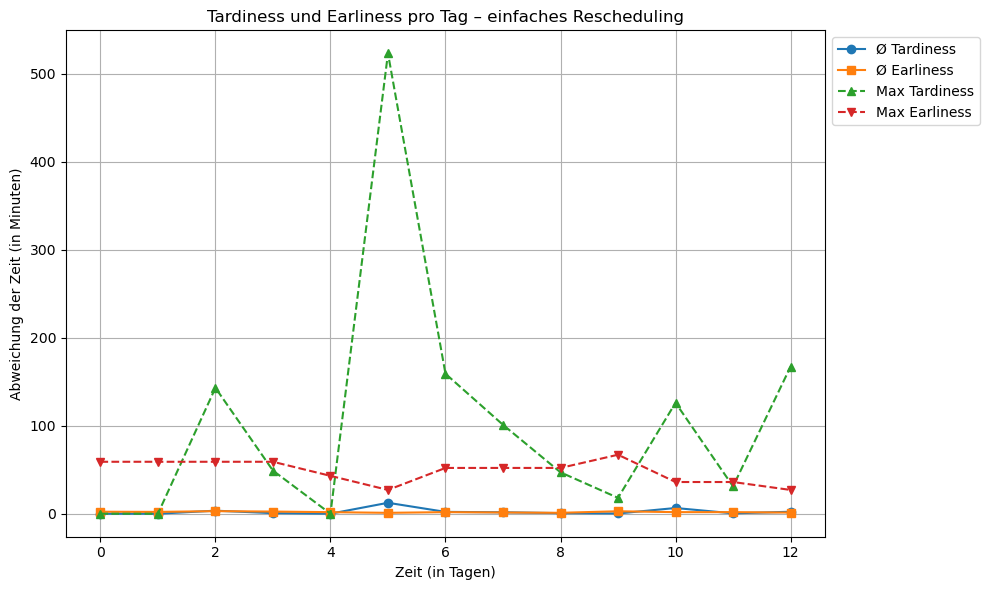

In [17]:
proof.plot_mean_and_max_tardiness_earliness(df_plan_simple_last_ops_list,
                                      subtitle = "einfaches Rescheduling",
                                      show_max=True)


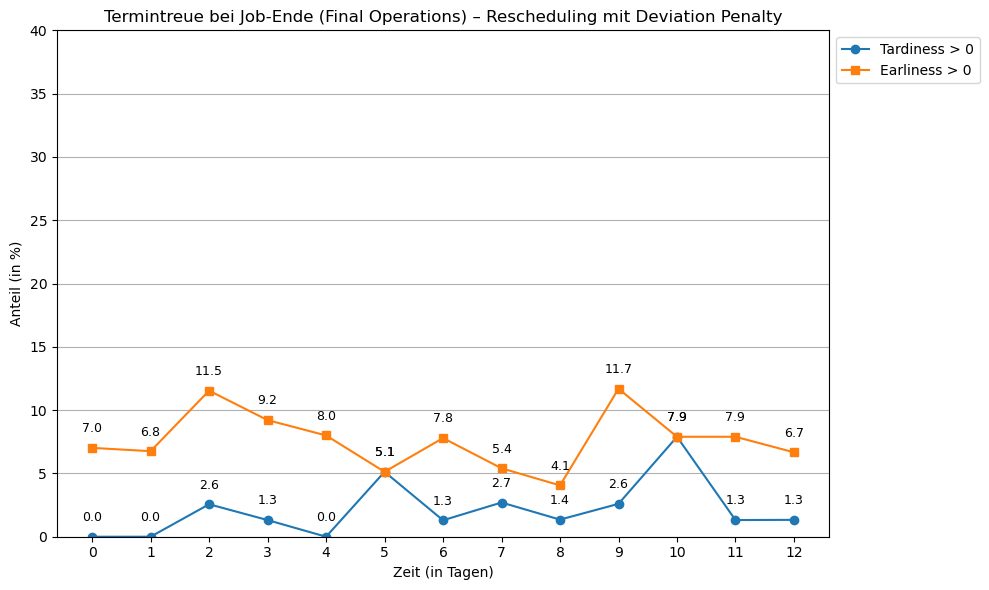

In [18]:
simple_tardi_ratio, simple_earli_ratio, simple_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_simple_last_ops_list)

proof.plot_tardiness_earliness_ideal_per_day(
    simple_tardi_ratio,
    simple_earli_ratio,
#    simple_ideal_ratio,
    subtitle = "Rescheduling mit Deviation Penalty",
    y_lim = 40
)

### b) Mit Deviation Penalty

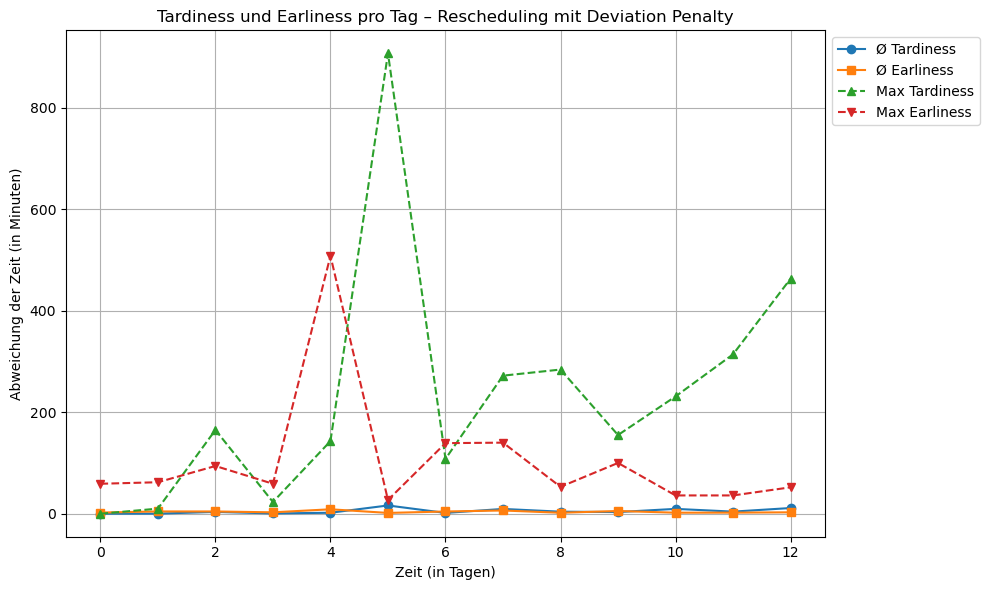

In [20]:
proof.plot_mean_and_max_tardiness_earliness(df_plan_devpen_last_ops_list, 
                                      subtitle = "Rescheduling mit Deviation Penalty",
                                      show_max=True)


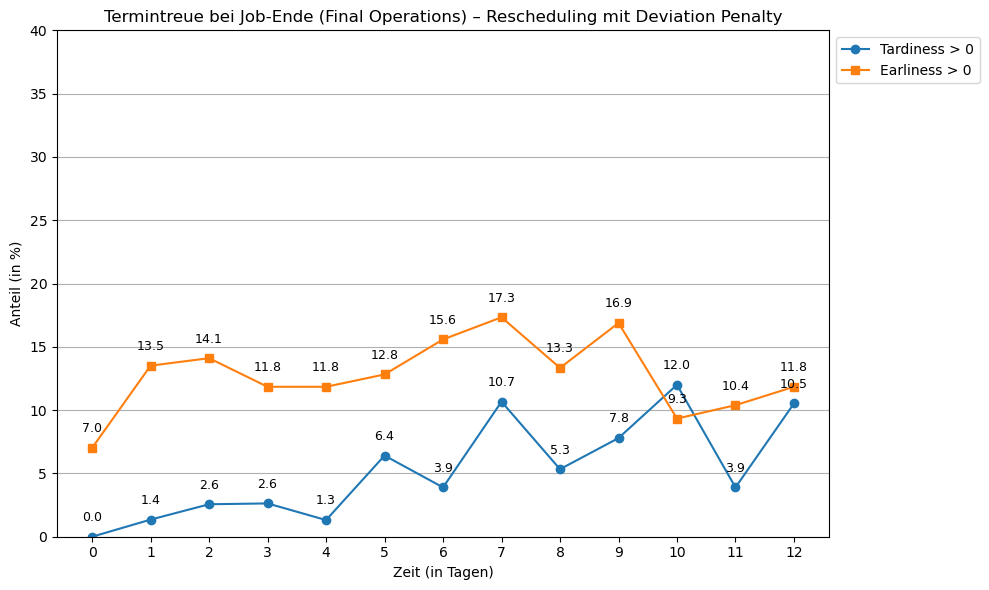

In [21]:
devpen_tardi_ratio, devpen_earli_ratio, devpen_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_ideal_per_day(
    devpen_tardi_ratio,
    devpen_earli_ratio,
#    devpen_ideal_ratio,
    subtitle = "Rescheduling mit Deviation Penalty",
    y_lim = 40
)


### C) Vergleich

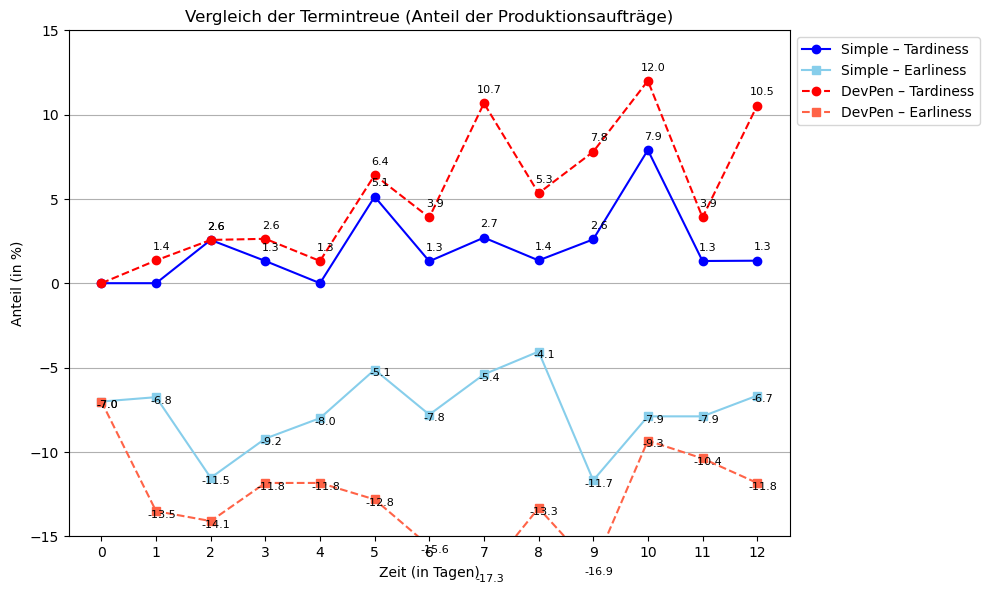

In [23]:
proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    labels=("Simple", "DevPen"),
    ylabel="Anteil (in %)",
    subtitle = "(Anteil der Produktionsaufträge)",
    y_lim_min=-15,
    y_lim_max=15,
    as_percentage=True
)


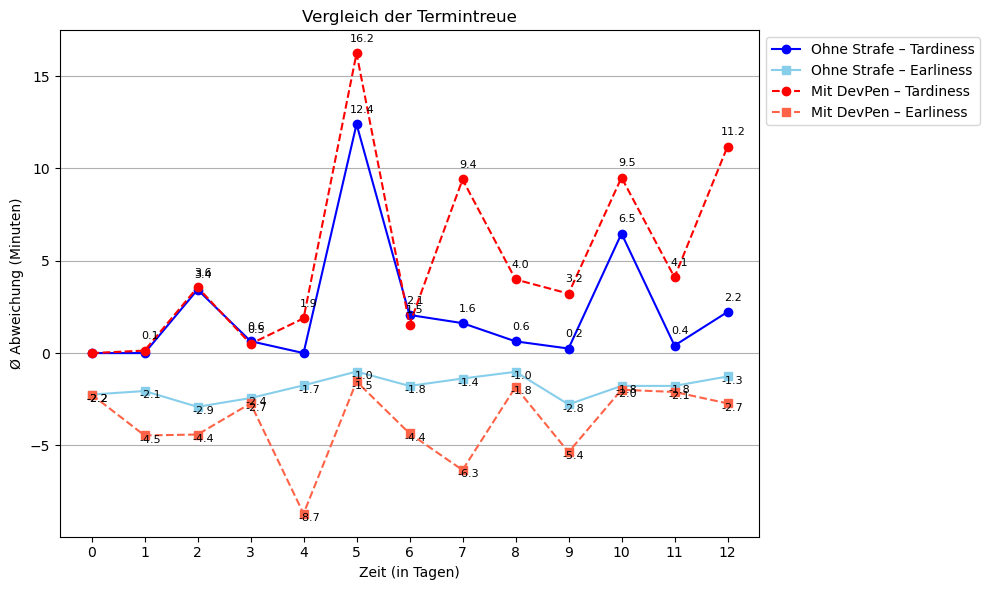

In [24]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    labels=("Ohne Strafe", "Mit DevPen"),
    ylabel="Ø Abweichung (Minuten)",
    subtitle = "",
    as_percentage=False
)

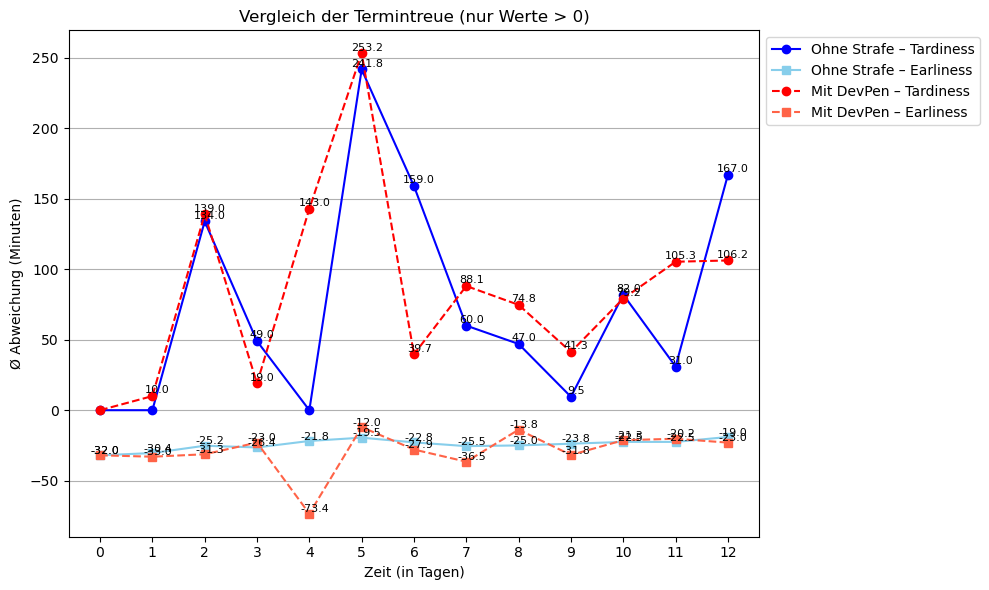

In [25]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_nonzero_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_nonzero_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

proof.plot_tardiness_earliness_two_methods(
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    labels=("Ohne Strafe", "Mit DevPen"),
    ylabel="Ø Abweichung (Minuten)",
    subtitle = "(nur Werte > 0)",
    as_percentage=False
)

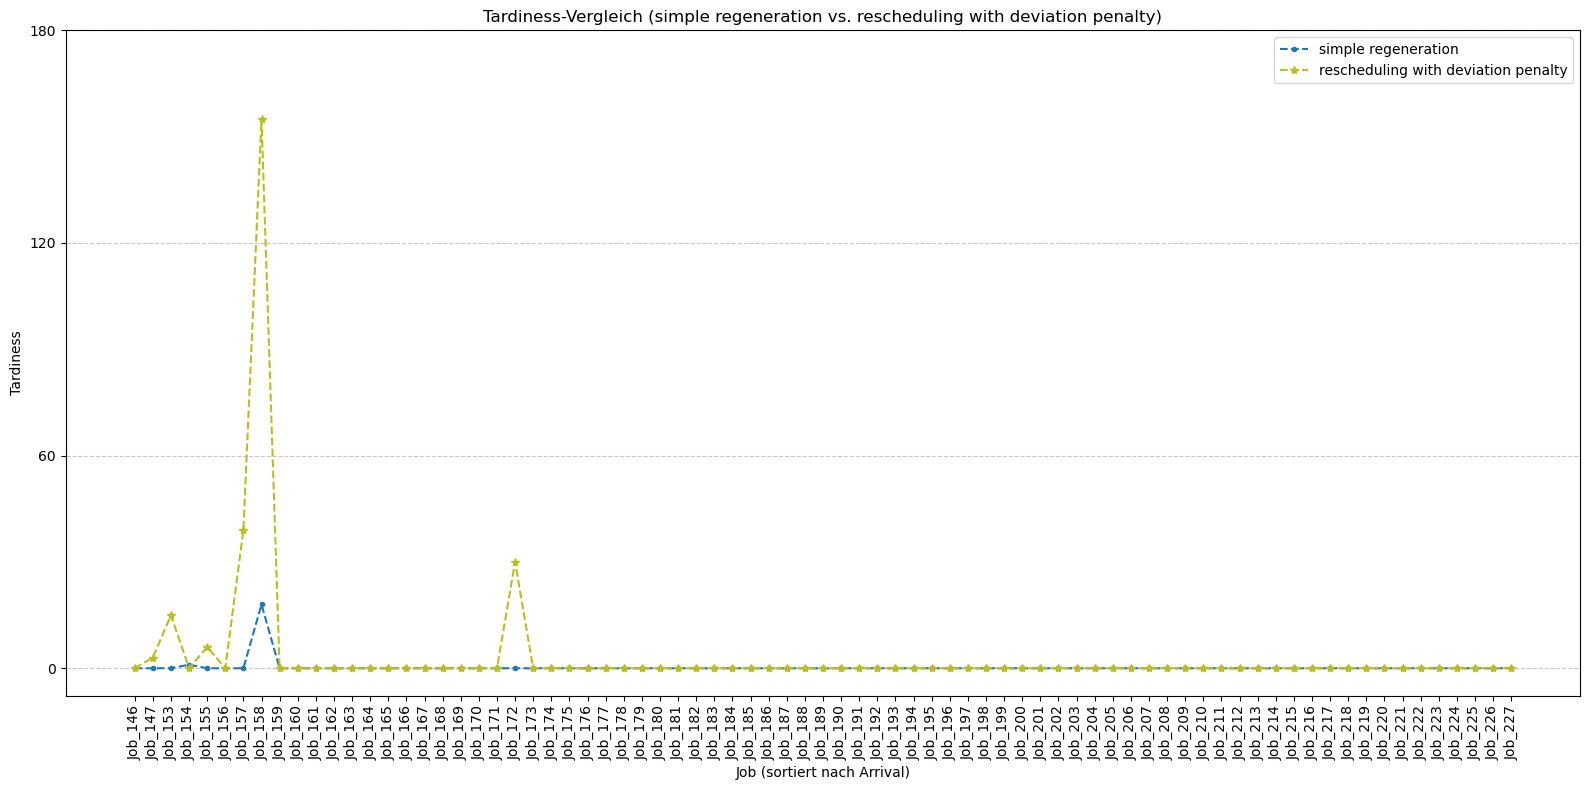

In [26]:
df_compare = proof.compare_and_plot_tardiness_single_day(
    df_plan_simple_last_ops_list[9],
    df_plan_devpen_last_ops_list[9],
    show_regression=False
)

## II) Plan-Nervosität - Wu

### "Simple" vs "mit Deviation Penalty"

In [29]:
# Totale Abweichung (Summe)
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list)
deviations_simple

[0.0,
 53953,
 66310,
 41674,
 63729,
 65781,
 58442,
 79023,
 51256,
 48205,
 46605,
 62038,
 79277]

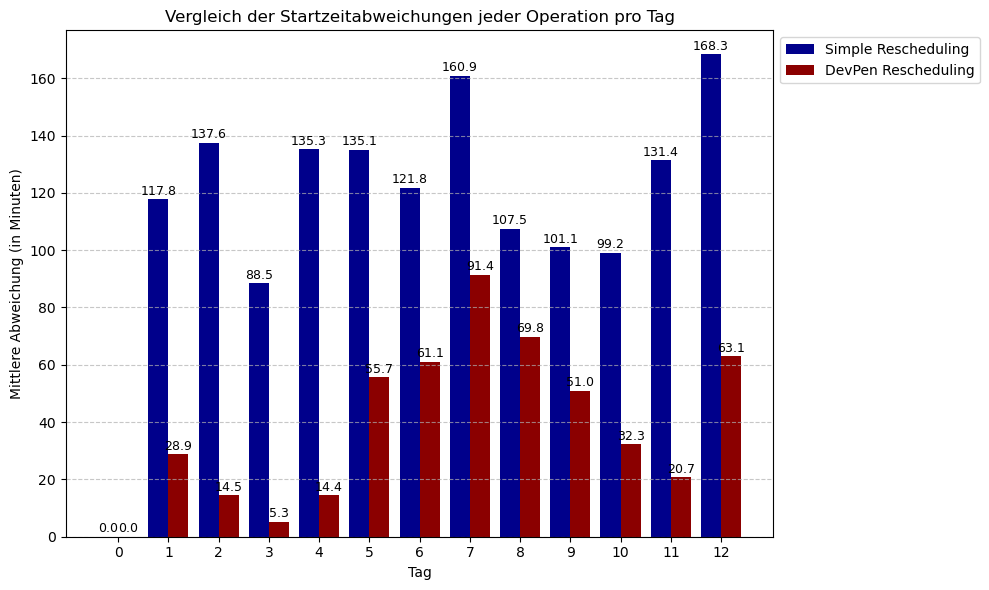

In [30]:
# Mittlere Abweichung
deviations_simple = calc.compute_daily_starttime_deviations(df_plan_simple_list, method="mean")
deviations_devpen = calc.compute_daily_starttime_deviations(df_plan_devpen_list, method="mean")

# Plot
proof.plot_two_starttime_deviation_bars(deviations_simple, deviations_devpen,
                                  label_A="Simple Rescheduling",
                                  label_B="DevPen Rescheduling",
                                  ylabel="Mittlere Abweichung")


## Proof of Conecept V1

In [32]:
simple_tardi_ratio, simple_earli_ratio, simple_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_simple_last_ops_list)
devpen_tardi_ratio, devpen_earli_ratio, devpen_ideal_ratio = calc.compute_tardiness_earliness_ideal_ratios(df_plan_devpen_last_ops_list)

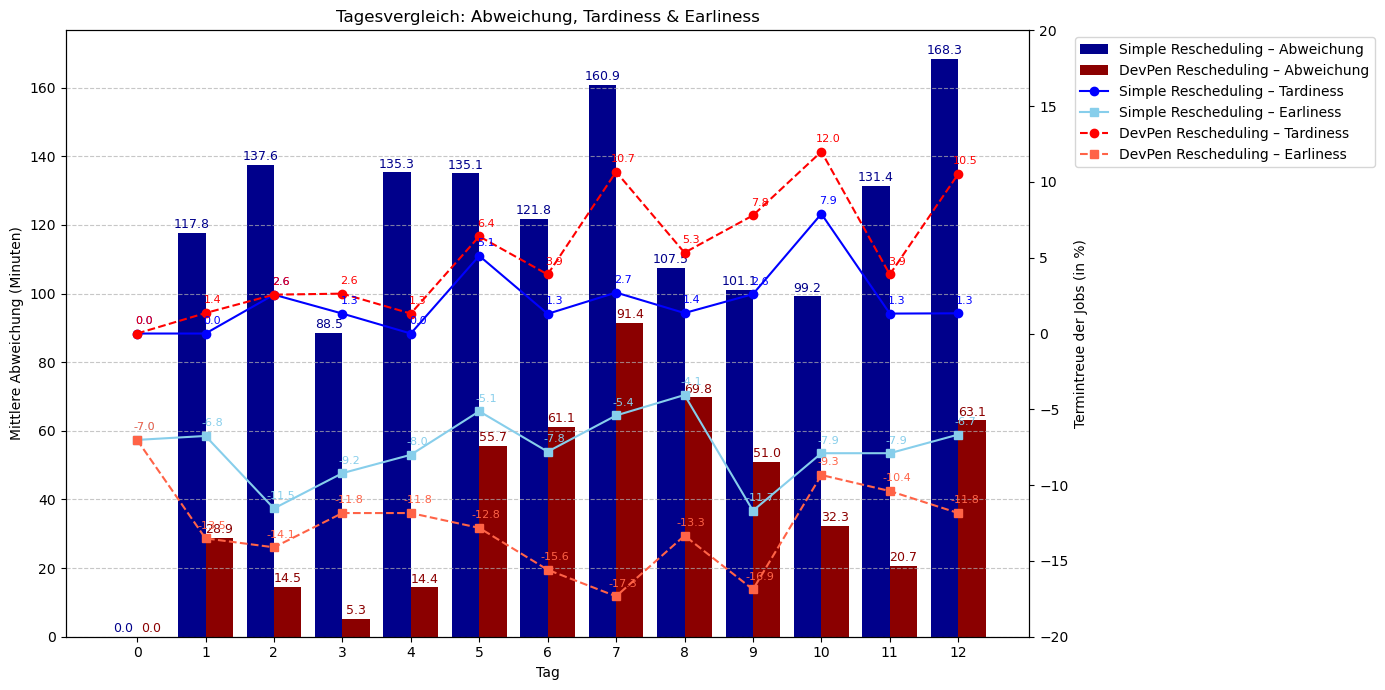

In [33]:
proof.proof_of_concept_v1(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Tardiness & Earliness",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Termintreue der Jobs (in %)",
    y_right_lim=20
)


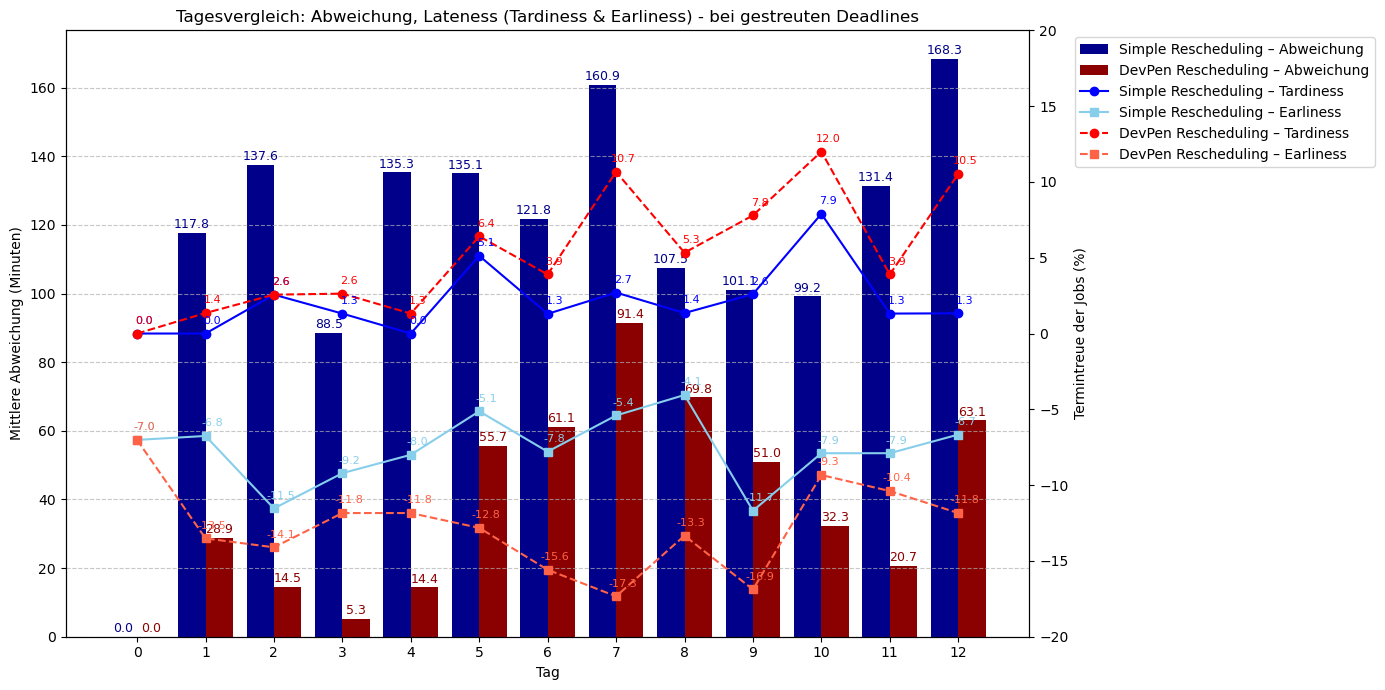

In [34]:
proof.proof_of_concept_v2(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_tardi_ratio,
    earliness_A=simple_earli_ratio,
    tardiness_B=devpen_tardi_ratio,
    earliness_B=devpen_earli_ratio,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Lateness (Tardiness & Earliness) - bei gestreuten Deadlines",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Termintreue der Jobs",
    y_right_lim_min = -20,
    y_right_lim_max = 20,
    as_percentage=True  # zeigt Tardiness/Earliness in Prozent
)


In [35]:
simple_mean_tardiness, simple_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_simple_last_ops_list)
devpen_mean_tardiness, devpen_mean_earliness = calc.compute_mean_tardiness_earliness(df_plan_devpen_last_ops_list)

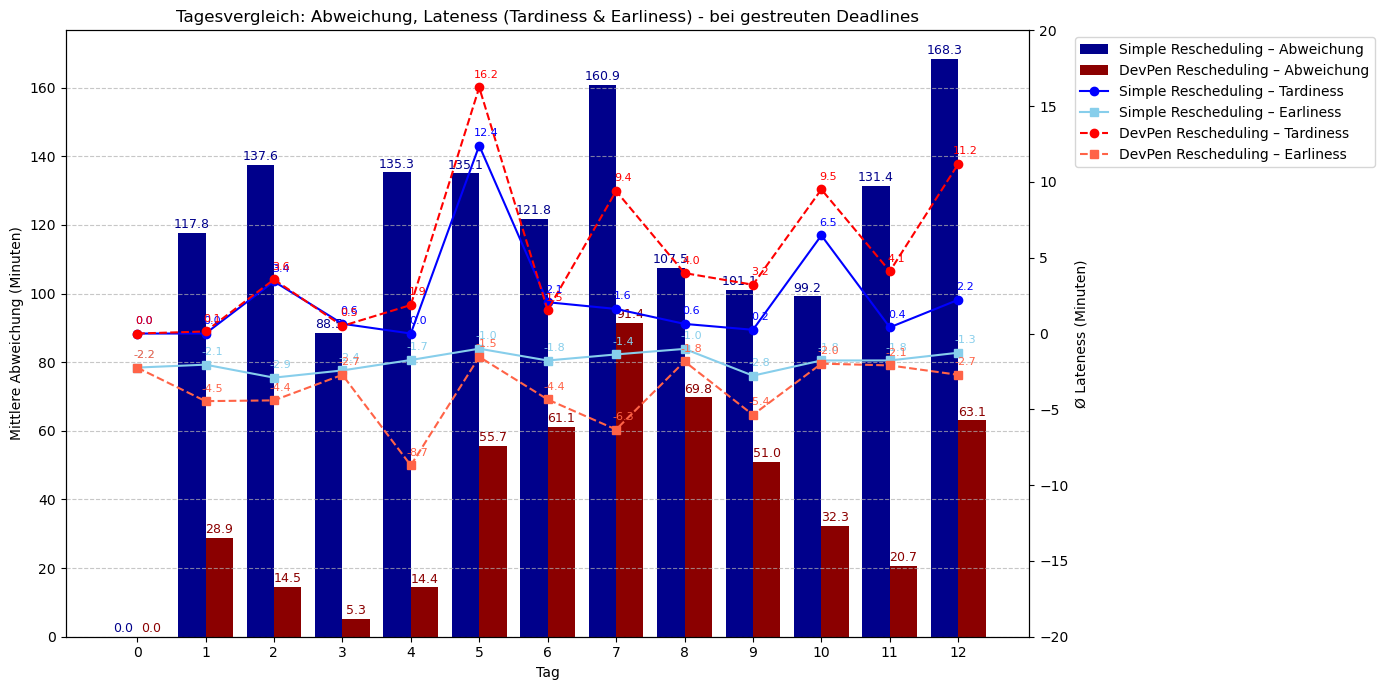

In [36]:
proof.proof_of_concept_v2(
    dev_A=deviations_simple,
    dev_B=deviations_devpen,
    tardiness_A=simple_mean_tardiness,
    earliness_A=simple_mean_earliness,
    tardiness_B=devpen_mean_tardiness,
    earliness_B=devpen_mean_earliness,
    label_A="Simple Rescheduling",
    label_B="DevPen Rescheduling",
    title="Tagesvergleich: Abweichung, Lateness (Tardiness & Earliness) - bei gestreuten Deadlines",
    ylabel_left="Mittlere Abweichung (Minuten)",
    ylabel_right="Ø Lateness",
    y_right_lim_min = -20,
    y_right_lim_max=20,
    as_percentage=False
)